In [1]:
import sys
sys.path.append('../src')

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from graph_builder import GraphePERT
from pert_calculator import CalculateurPERT
from visualisation import creer_graphe_pert, creer_diagramme_gantt

## Chargement et Analyse

In [2]:
graphe = GraphePERT('../data/taches.csv')
graphe.afficher_resume()

calc = CalculateurPERT(graphe)
resultats = calc.executer_analyse_complete()
calc.afficher_resume()

Nombre de taches: 9
Nombre d'arcs: 12

Taches initiales: A
Taches finales: I

Validation: Graphe Valide
Duree totale du projet: 64 minutes
Chemin critique: A -> B -> F -> H -> I
Nombre de taches critiques: 5

Taches non-critiques (avec marge):
  C (Compile Frontend): 5 minutes de marge
  D (Unit Tests Back): 4 minutes de marge
  E (Unit Tests Front): 12 minutes de marge
  G (Security Scan (SAST)): 32 minutes de marge


## Tableau des Resultats

In [6]:
tableau = calc.generer_tableau_resultats()
df = pd.DataFrame(tableau)
print(df.to_string(index=False))

df.to_csv('../../rapport/resultats_pert.csv', index=False)

Code                  Nom  Duree  ES  EF  LS  LF  Marge Critique
   A         Git Checkout      2   0   2   0   2      0      Oui
   B      Compile Backend     15   2  17   2  17      0      Oui
   C     Compile Frontend     10   2  12   7  17      5      Non
   G Security Scan (SAST)     20   2  22  34  54     32      Non
   D      Unit Tests Back      8  17  25  21  29      4      Non
   E     Unit Tests Front      5  12  17  24  29     12      Non
   F   Build Docker Image     12  17  29  17  29      0      Oui
   H    Integration Tests     25  29  54  29  54      0      Oui
   I       Deploy to Prod     10  54  64  54  64      0      Oui


## Graphe PERT

Graphe sauvegarde: ../../rapport/figures/graphe_pert.png


(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Graphe PERT - Pipeline CI/CD\nRouge = Chemin Critique'}, xlabel='Temps (minutes)'>)

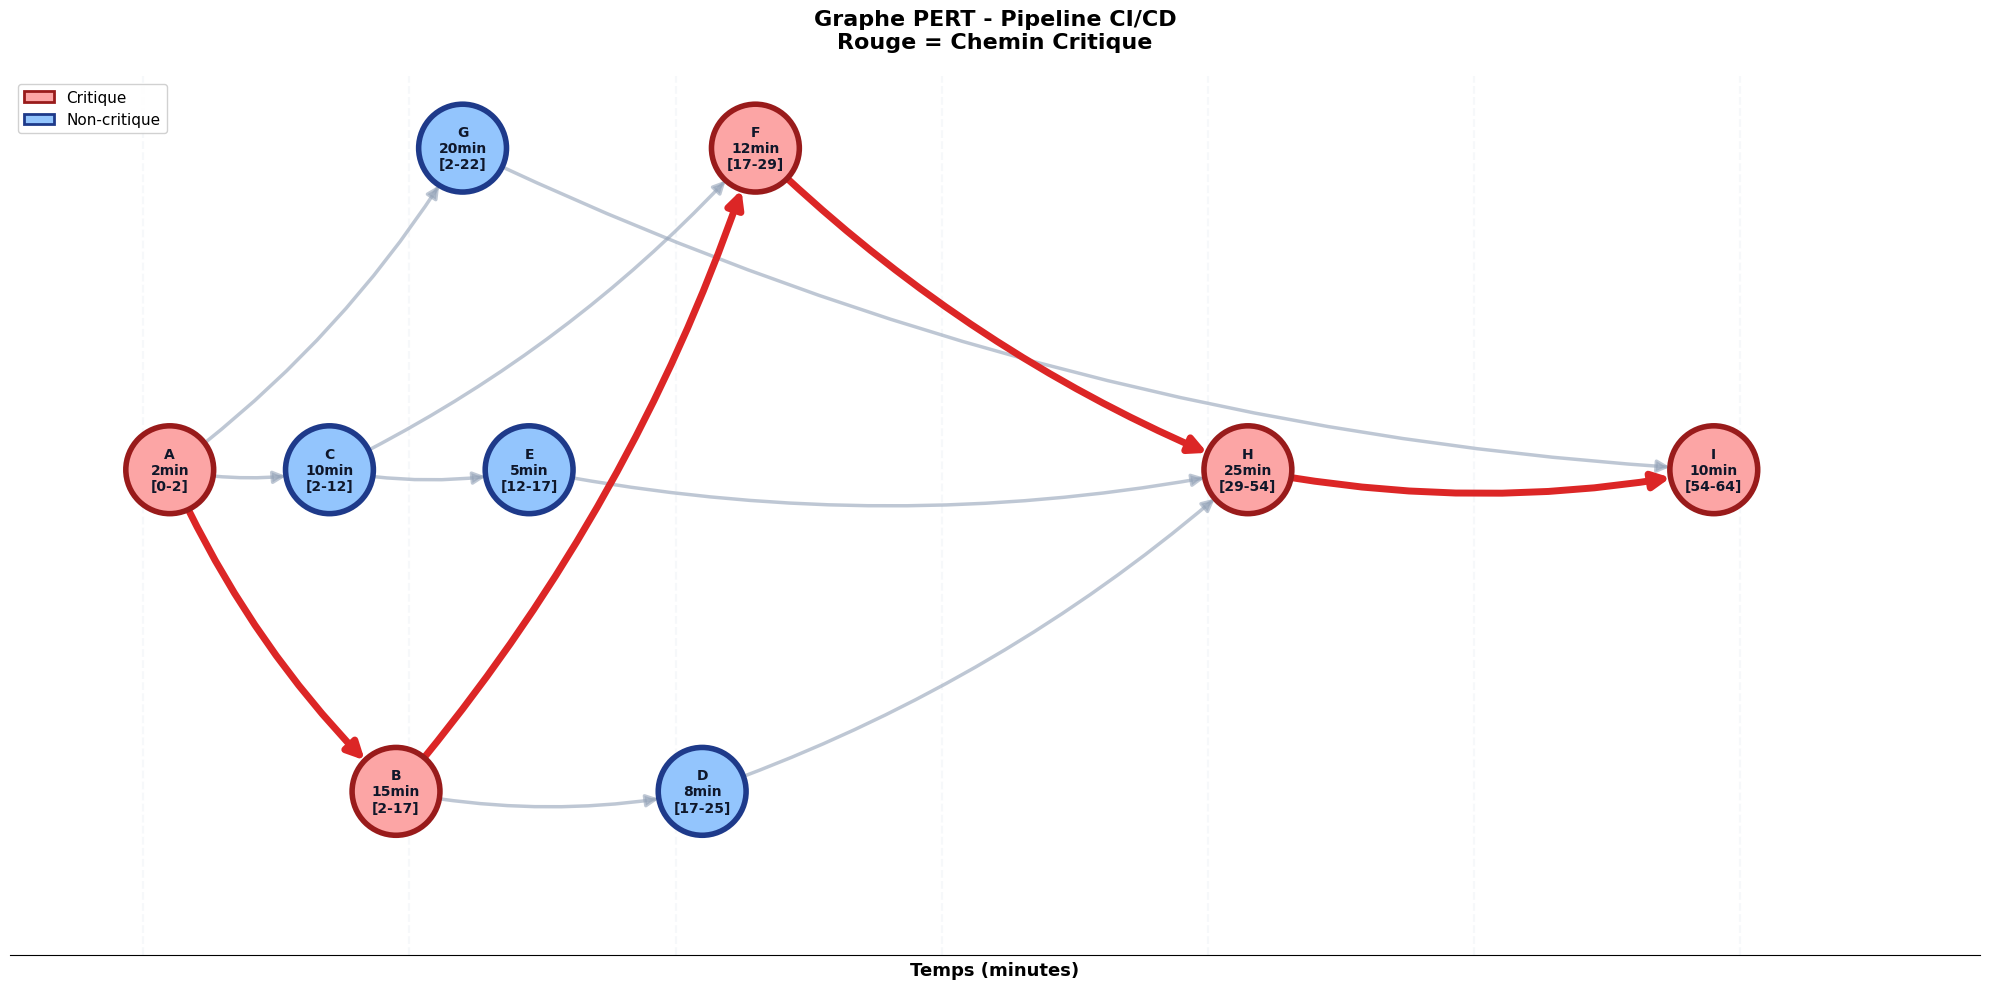

In [4]:
creer_graphe_pert(graphe, resultats, '../../rapport/figures/graphe_pert.png')

## Diagramme de Gantt

Gantt sauvegarde: ../../rapport/figures/gantt.png


(<Figure size 1400x800 with 1 Axes>,
 <Axes: title={'center': 'Diagramme de Gantt'}, xlabel='Temps (minutes)'>)

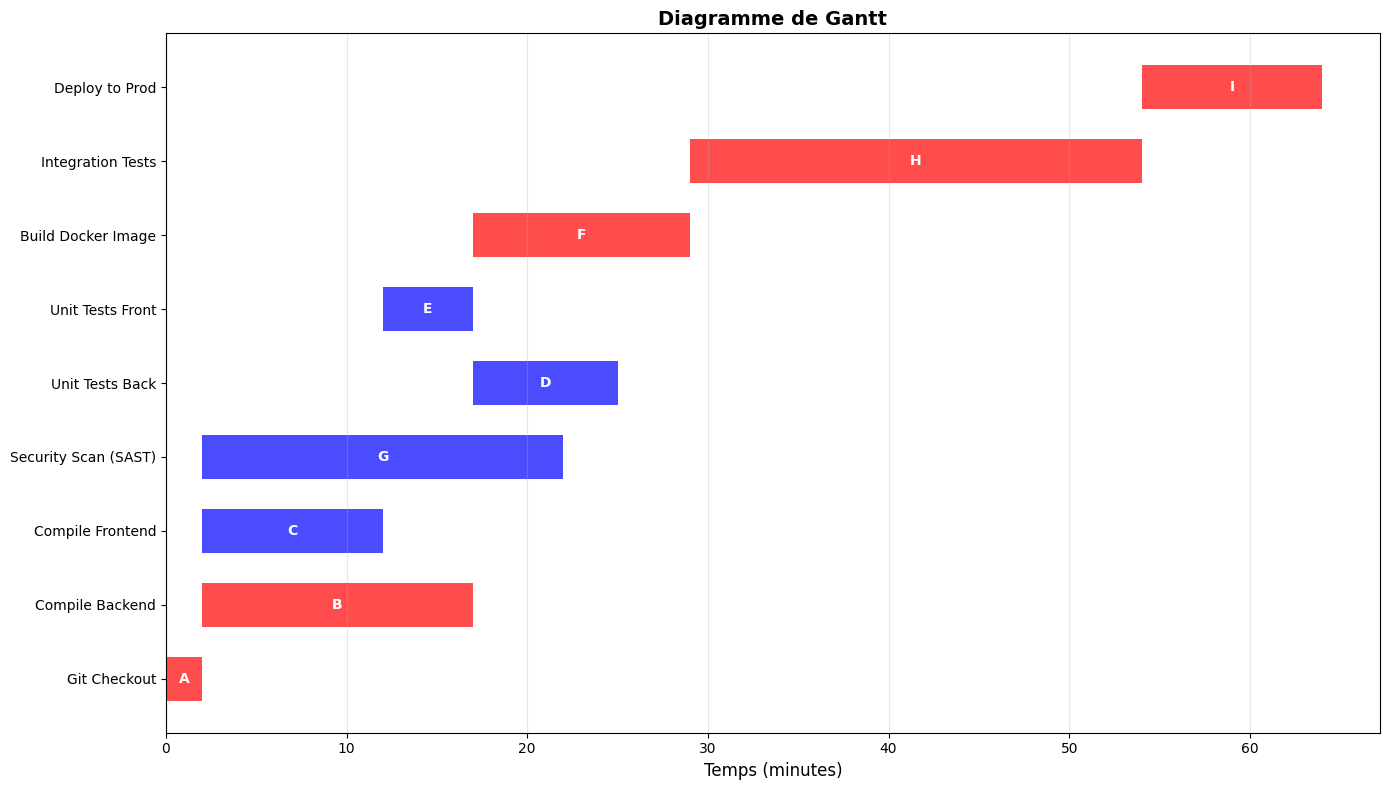

In [5]:
creer_diagramme_gantt(graphe, resultats, '../../rapport/figures/gantt.png')